In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
import seaborn as sns

In [2]:
dset = pd.read_csv("../cardio_train.csv")

In [3]:
dset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
dset.shape

(70000, 13)

In [5]:
data = dset.drop(['id'], axis=1)

In [6]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
# checking for null values
data.isnull().sum(), pd.isnull(data).values.any(), pd.isnull(data).values.sum()

(age            0
 gender         0
 height         0
 weight         0
 ap_hi          0
 ap_lo          0
 cholesterol    0
 gluc           0
 smoke          0
 alco           0
 active         0
 cardio         0
 dtype: int64,
 False,
 0)

In [8]:
# target classes classes counts
data['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [9]:
# converting the age from Days to Years
# data['age']=data['age']/365
data['age'] = data['age'].map(lambda x : x // 365)

In [10]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
# checking for duplicate values
data.duplicated().sum()

3208

In [12]:
# removing duplicate values from DataFrame
data.drop_duplicates(inplace=True)

In [13]:
# checking the shape of the dataset after dropping duplicate values
data.shape

(66792, 12)

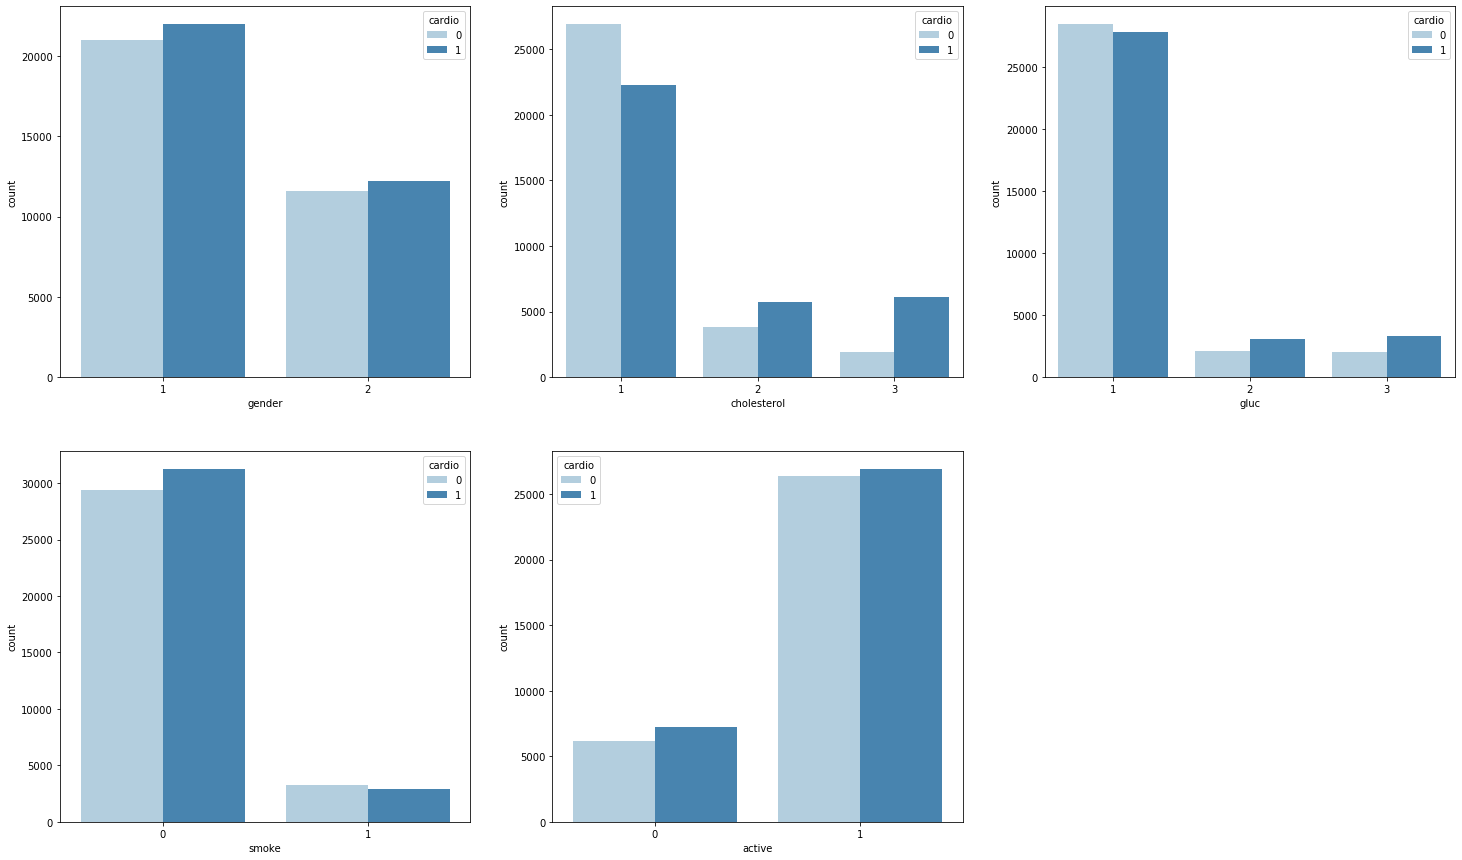

In [14]:
#  visualizing sample feature counts
# gender 1 = women, 2 = male
fig, axes = plt.subplots(2, 3, figsize=(25,15))
fig.delaxes(axes[1][2])
for counter, index in enumerate(['gender', 'cholesterol', 'gluc', 'smoke', 'active']):
    sns.countplot(x=index, hue='cardio', palette="Blues", data=data[[index, 'cardio']], ax=axes[counter//3, counter%3])

In [15]:
data['cardio'].value_counts()

1    34193
0    32599
Name: cardio, dtype: int64

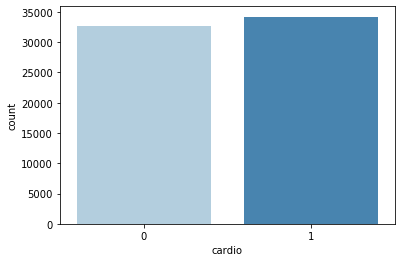

In [16]:
# target classes visualization
sns.countplot(data['cardio'], palette="Blues")

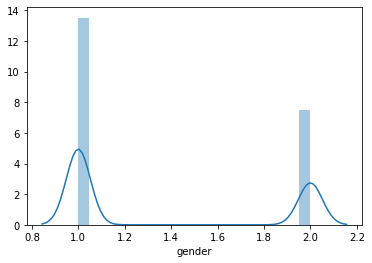

In [17]:
# visualizing samples by gender 1 = women, 2 = male
# sns.countplot(x='gender', data=data, palette="Blues", hue="cardio")
sns.distplot(data["gender"])

In [18]:
# feature correlation
data.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.023476,-0.083374,0.052897,0.020842,0.017534,0.155554,0.098838,-0.049257,-0.030910,-0.009648,0.235296
gender,-0.023476,1.000000,0.503816,0.149692,0.005230,0.014215,-0.043255,-0.025645,0.340392,0.170864,0.009679,0.001507
height,-0.083374,0.503816,1.000000,0.291874,0.005622,0.006358,-0.049439,-0.017816,0.190478,0.095816,-0.006452,-0.009651
weight,0.052897,0.149692,0.291874,1.000000,0.029673,0.042124,0.134052,0.101412,0.062025,0.062805,-0.011346,0.175451
ap_hi,0.020842,0.005230,0.005622,0.029673,1.000000,0.015824,0.022617,0.010964,-0.001719,0.000784,0.000724,0.053902
ap_lo,0.017534,0.014215,0.006358,0.042124,0.015824,1.000000,0.022096,0.009348,0.003925,0.009613,0.006054,0.064847
cholesterol,0.155554,-0.043255,-0.049439,0.134052,0.022617,0.022096,1.000000,0.444593,0.003579,0.030680,0.018279,0.213987
gluc,0.098838,-0.025645,-0.017816,0.101412,0.010964,0.009348,0.444593,1.000000,-0.009783,0.007392,-0.000254,0.081657
smoke,-0.049257,0.340392,0.190478,0.062025,-0.001719,0.003925,0.003579,-0.009783,1.000000,0.337692,0.030174,-0.023036
alco,-0.030910,0.170864,0.095816,0.062805,0.000784,0.009613,0.030680,0.007392,0.337692,1.000000,0.028907,-0.013238


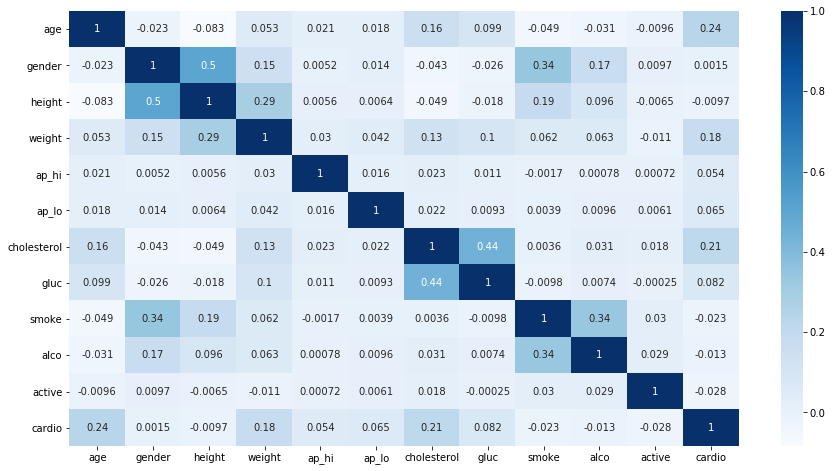

In [19]:
# plotting feaure correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="Blues")

Text(0.5, 1.0, 'Visualization of outliers')

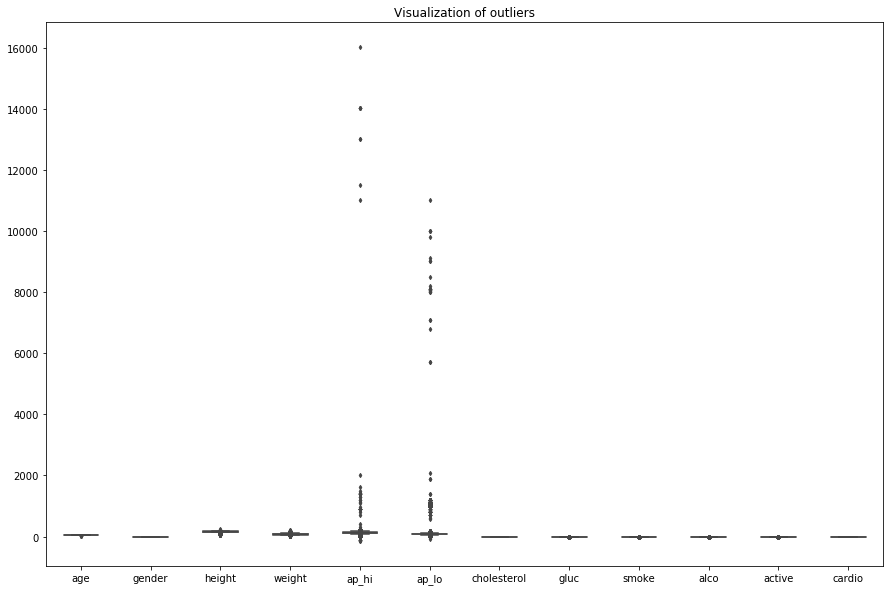

In [20]:
# checking for outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)
plt.title("Visualization of outliers")

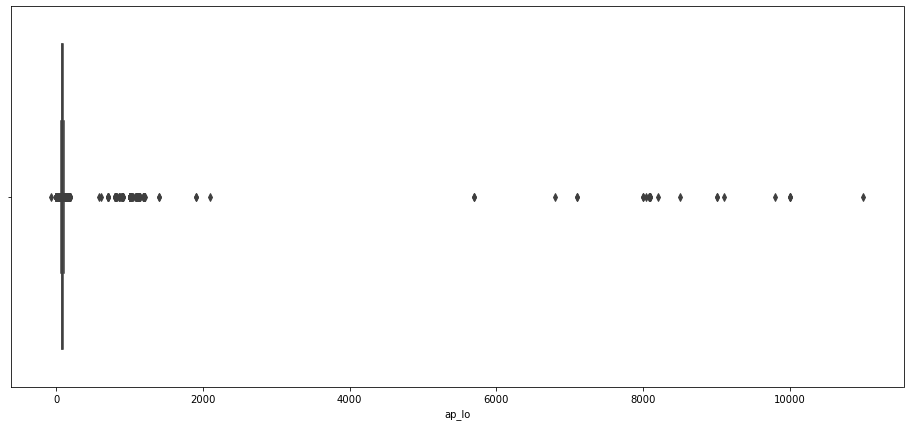

In [21]:
plt.figure(figsize=(16,7))
sns.boxplot(data['ap_lo'])

In [22]:
data['ap_lo'].max()

11000

In [23]:
# method to detect outliers and based on the mean and standard deviation
def outliers_indices(feature):
    mid = data[feature].mean()
    sigma = data[feature].std()
    return data[(data[feature] < mid - 3*sigma) | (data[feature] > mid + 3*sigma)].index

In [24]:
wrong_age = outliers_indices('age')
wrong_height = outliers_indices('height')
wrong_weight = outliers_indices('weight')
wrong_hi = outliers_indices('ap_hi')
wrong_lo = outliers_indices('ap_lo')

out = set(wrong_age) | set(wrong_height) | set(wrong_weight) | set(wrong_hi) | set(wrong_lo)

print(len(out))


1846


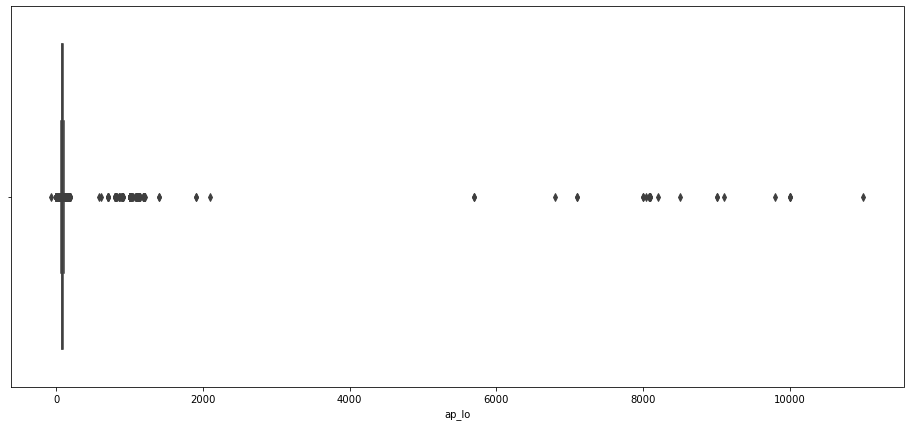

In [52]:
plt.figure(figsize=(16,7))
sns.boxplot(data['ap_lo'])

In [53]:
data['ap_lo'].max()

11000

In [23]:
# ap_hi lower limit
ap_hi_lowerlimit = data['ap_hi'].quantile(0.3)
ap_hi_lowerlimit

120.0

In [24]:
# ap_hi upper limit
ap_hi_upperlimit = data['ap_hi'].quantile(0.7)
ap_hi_upperlimit

130.0

In [25]:
# samples that are below the lower limit and above the upper limit
ap_hi_samples_below_lowerlimit = data[data['ap_hi'] < ap_hi_lowerlimit]
# samples that are above the upper limit
ap_hi_samples_above_upperlimit = data[data['ap_hi'] > ap_hi_upperlimit]

ap_hi_samples_above_upperlimit['ap_hi'].count(), ap_hi_samples_below_lowerlimit['ap_hi'].count()

(19601, 12822)

In [33]:
data = pd.DataFrame(data)
data.quantile([.1, .25, .5, .75], axis = 0) 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0.10,43.0,1.0,154.0,58.0,110.0,70.0,1.0,1.0,0.0,0.0,0.0,0.0
0.25,48.0,1.0,159.0,65.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
0.50,53.0,1.0,165.0,72.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0
0.75,58.0,2.0,170.0,83.0,140.0,90.0,2.0,1.0,0.0,0.0,1.0,1.0


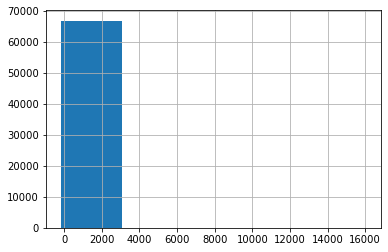

In [36]:
data['ap_hi'].hist(bins=5)

In [62]:
# First step of PCA for dimesionality reduction is standard normalization.
# (checking if features follow a gaussian distribution where mean=0, std=1),
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [63]:
# all values are converted to the same scale
scaled_data = scaler.transform(data)

In [64]:
# scaled data
scaled_data

array([[-0.42032461,  1.34436981,  0.43896352, ..., -0.24423808,
         0.50228218, -1.02415683],
       [ 0.31457833, -0.74384294, -1.00094864, ..., -0.24423808,
         0.50228218,  0.97641296],
       [-0.27334402, -0.74384294,  0.07898548, ..., -0.24423808,
        -1.99091277,  0.97641296],
       ...,
       [-0.12636343,  1.34436981,  2.23885372, ...,  4.09436561,
        -1.99091277,  0.97641296],
       [ 1.19646187, -0.74384294, -0.16099988, ..., -0.24423808,
        -1.99091277,  0.97641296],
       [ 0.46155892, -0.74384294,  0.67894888, ..., -0.24423808,
         0.50228218, -1.02415683]])

In [65]:
# shape of scaled data
scaled_data.shape

(66792, 12)

In [66]:
# PCA for dimensionality reduction

# n_components=2 means we convert number of features to 2
# If 0 < n_components < 1 and svd_solver == 'full', select the number of components 
# such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
# pca = PCA(n_components=6, svd_solver='full')
pca = PCA(n_components=2)

In [69]:
# fitting the PCA instance
pca.fit(scaled_data)

PCA(n_components=2)

In [70]:
# transforming scaled data so that we reduce number of features
x_pca = pca.transform(scaled_data)

In [71]:
# checking the shape for the scaled data and PCA respectively
scaled_data.shape, x_pca.shape

((66792, 12), (66792, 2))

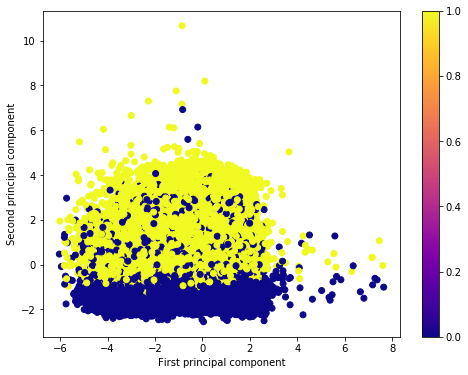

In [72]:
# plotting the first two dimensions
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=data["cardio"], cmap="plasma")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.colorbar()

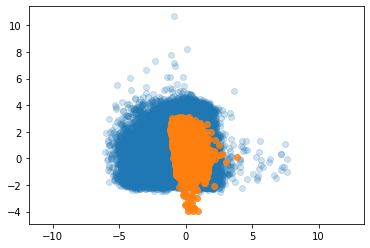

In [73]:
# new reduced dimensions vs initial data before dimension reduction
X_new = pca.inverse_transform(x_pca)
plt.scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 2], alpha=0.8)
plt.axis('equal');

In [74]:
# defining independent variables and target variable
X = x_pca
y = data["cardio"]

In [75]:
X

array([[-5.11685229e-01, -1.44712711e+00],
       [ 9.48432229e-01,  1.96623061e+00],
       [ 8.39359979e-01,  1.32331099e+00],
       ...,
       [-3.76839482e+00,  2.02445959e+00],
       [ 8.95534239e-01,  1.22441010e+00],
       [ 3.85024905e-01,  3.68752800e-03]])

In [76]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69994    1
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 66792, dtype: int64

In [77]:
# splitting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

In [78]:
# Decision Tree classifier
classifier = DecisionTreeClassifier()

In [79]:
# fitting the classifier
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [80]:
# predicting the outcome for testing data
y_pred = classifier.predict(X_test)

In [81]:
# measuring prediction accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.7497754266892903


In [82]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      9678
           1       0.76      0.75      0.76     10360

    accuracy                           0.75     20038
   macro avg       0.75      0.75      0.75     20038
weighted avg       0.75      0.75      0.75     20038



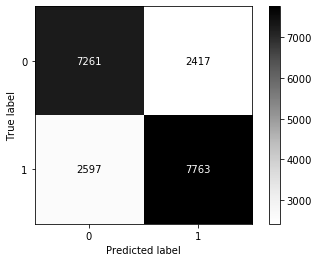

In [83]:
# confusion matrix
print(plot_confusion_matrix(classifier, X_test, y_test, cmap="Greys"))

In [85]:
# checking which number of dimensions gives higher accuracy
# finding the best number of components after oversampling with SMOTE
for component in range(1,12):
    pca = PCA(n_components=component)
    pca.fit(scaled_data)
    x_pca = pca.transform(scaled_data)
    X = x_pca
    y = data["cardio"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    classifier =DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Component:",component)
    print("Accuracy:",accuracy*100)
    print("******************************")

Component: 1
Accuracy: 51.92134943607146
******************************
Component: 2
Accuracy: 82.91745683201917
******************************
Component: 3
Accuracy: 82.91745683201917
******************************
Component: 4
Accuracy: 82.91745683201917
******************************
Component: 5
Accuracy: 82.91745683201917
******************************
Component: 6
Accuracy: 82.91745683201917
******************************
Component: 7
Accuracy: 82.91745683201917
******************************
Component: 8
Accuracy: 82.91745683201917
******************************
Component: 9
Accuracy: 82.91745683201917
******************************
Component: 10
Accuracy: 82.91745683201917
******************************
Component: 11
Accuracy: 84.9436071464218
******************************


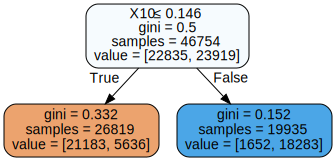

In [86]:

dot_data = tree.export_graphviz(classifier, out_file=None, 
                                filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

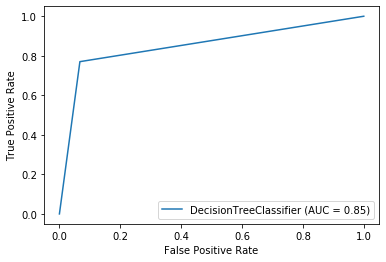

In [89]:
# ROC curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(classifier,X_test,y_test)

In [90]:
# Before PCA

In [91]:
x_before_pca = data.drop(['cardio'], axis=1)
y_before_pca = data['cardio']

In [92]:
# splitting data into training and testing data
X_train_no_pca, X_test_no_pca, y_train_no_pca, y_test_no_pca = train_test_split(x_before_pca, y_before_pca, test_size=0.3, random_state=100)

In [93]:
# NB classifier after oversampling before PCA
classifier.fit(X_train_no_pca, y_train_no_pca)

DecisionTreeClassifier(max_depth=1)

In [94]:
y_pred_no_pca = classifier.predict(X_test_no_pca)

In [95]:
# accuracy before PCA
print(metrics.accuracy_score(y_test_no_pca, y_pred_no_pca)*100)

71.01507136440762


In [96]:
# classification report without PCA
print(classification_report(y_test_no_pca, y_pred_no_pca))

              precision    recall  f1-score   support

           0       0.67      0.79      0.73      9764
           1       0.76      0.63      0.69     10274

    accuracy                           0.71     20038
   macro avg       0.72      0.71      0.71     20038
weighted avg       0.72      0.71      0.71     20038



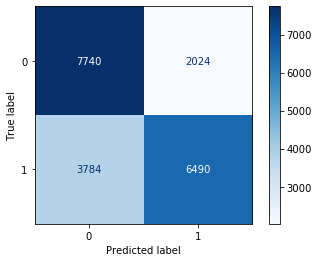

In [97]:
print(plot_confusion_matrix(classifier, X_test_no_pca, y_test_no_pca, cmap="Blues"))